In [3]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [35]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_450'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [36]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450
airFoil_450_0
airFoil_450_20
write airfoil2d/airFoil_450/input.npy


In [37]:
data=np.load(mainfolder+'/input.npy')

In [38]:
normal=np.load('cfdnetplus_models/model_sep1/norm.npy')
data=data*(1/normal)

In [39]:
modelfolder='cfdnetplus_models/model_sep1/model_Ukomeganut'
model1 = tf.keras.models.load_model(modelfolder)
modelfolder='cfdnetplus_models/model_sep1/model_p'
model2 = tf.keras.models.load_model(modelfolder)


#normal=np.load(modelfolder+'normal.npy')
#model = tf.keras.models.load_model(modelfolder)

In [40]:
pred1=model1.predict(data[:,:,:,[0,1,2,4,5,6]])
pred2=model2.predict(data[:,:,:,[3]])

print(pred2.shape)
pred=np.concatenate((pred1[:,:,:,[0,1,2]] ,pred2 ,pred1[:,:,:,[3,4,5]]),axis=3)
np.save(mainfolder+'/pred', pred*normal)
print(pred.shape)

1/1 [==============================] - 0s 108ms/step
(1, 66, 256, 1)
(1, 66, 256, 7)


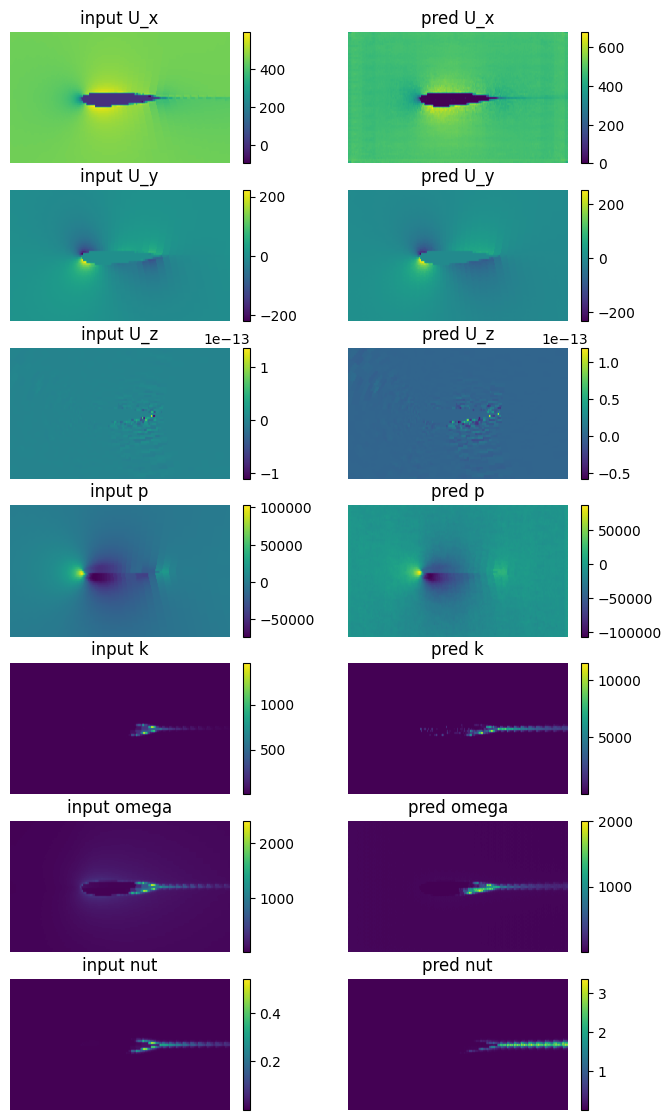

In [41]:
pred=np.load(mainfolder+'/pred.npy')
data=data*normal
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [42]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_0
airFoil_450_20
folder airfoil2d/airFoil_450/21 was created
write airfoil2d/airFoil_450/21/U
write airfoil2d/airFoil_450/21/p
write airfoil2d/airFoil_450/21/k
write airfoil2d/airFoil_450/21/omega
write airfoil2d/airFoil_450/21/nut
